<a href="https://colab.research.google.com/github/kubohenrique/airbnb_londres/blob/main/PROJETO_01_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> **Análise dos Dados do Airbnb -** ***Londres***

<center><img width="60%" src="https://image.freepik.com/fotos-gratis/o-relogio-ben_1160-795.jpg"></center>


O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="30%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Londres, e ver quais insights podem ser extraídos a partir de dados brutos.**

Londres é uma das cidades mais visitadas do continente europeu, por isso as opções de acomodações são muito grandes, o que torna a análise dos dados mais interessantes.

## Obtenção dos Dados

Os dados foram tirados do portal [Inside Airbnb]('http://insideairbnb.com/get-the-data.html)

In [2]:
# importar os pacotes necessarios
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/united-kingdom/england/london/2021-07-06/visualisations/listings.csv')

## Análise dos Dados

O intuito dessa etapa é analisar os dados obtidos para poder entender melhor o negócio a ser analisado.

**Dicionário das variáveis**

* *id* - Código identificador da propriedade
* *name* - Nome da propriedade no anúncio
* *host_id* - Código de identificação do anfitrião
* *host_name* - Nome do anfitrião
* *neighbourhood_group*
* *neighbourhood* - Bairro
* *latitude* - Coordenadas da latitude onde o imóvel está localizado
* *longitude* - Coordenadas da longitude onde o imóvel está localizado
* *room_type* - Tipo de acomodação
* *price* - Preço da diária
* *minimum_nights* - Mínimo de noites para a estadia
* *number_of_reviews* - Número de avaliações
* *last_review* - Data da última avaliação
* *reviews_per_month* - Quantidade de avaliações por mês
* *calculated_host_listings_count* - Quantidade de imóveis oferecidos pelo  mesmo anfitrião
* *availability_365* - Número de dias disponíveis ao ano.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11551,Arty and Bright London Apartment in Zone 2,43039,Adriano,NaN,Lambeth,51.46095,-0.11758,Entire home/apt,99,2,193,2018-04-29,1.63,3,290
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,65,1,21,2011-09-13,0.17,2,365
2,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,75,10,89,2019-08-10,0.81,1,319
3,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,307,4,43,2019-11-02,0.36,15,218
4,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,364


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [5]:
# identificar o volume de dados do DataFrame
print('Entradas:\t {}'.format(df.shape[0]))
print('Variáveis:\t {}'.format(df.shape[1]))

# verificar os tipos de variáveis
df.dtypes

Entradas:	 73364
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Os tipos de dados estão condizente com as variáveis, exceto a variável ***last review*** que está como ***object*** mas que na verdade é uma data, por isso irei tranformar no formato ***datetime***.

In [6]:
df.last_review = pd.to_datetime(df.last_review)

In [7]:
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                      float64
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

É sempre importante analisar os dados ausentes no Dataset, pois isso pode comprometer a análise, e futuramente alterar os resultados em um modelo de *machine learning*.

In [8]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

neighbourhood_group               1.000000
reviews_per_month                 0.307753
last_review                       0.307753
host_name                         0.008778
name                              0.000314
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

*   Constatou que a coluna `neighbourhood_group` está 100% ausente, o que indica que é um dado que pode ser excluido sem perdas para a análise.
*   `reviews_per_month` e `last_review`, possuem aproximadamente 31% de dados ausentes, um valor expressivo.
*   `host_name` e `name`, possuem aproximadamente valores nulos menores que 1%, que a princípio parece ser insignificante para a análise.



In [9]:
df.drop('neighbourhood_group', axis=1, inplace=True)

### **Q3. Qual o tipo de distribuição das variáveis?** 

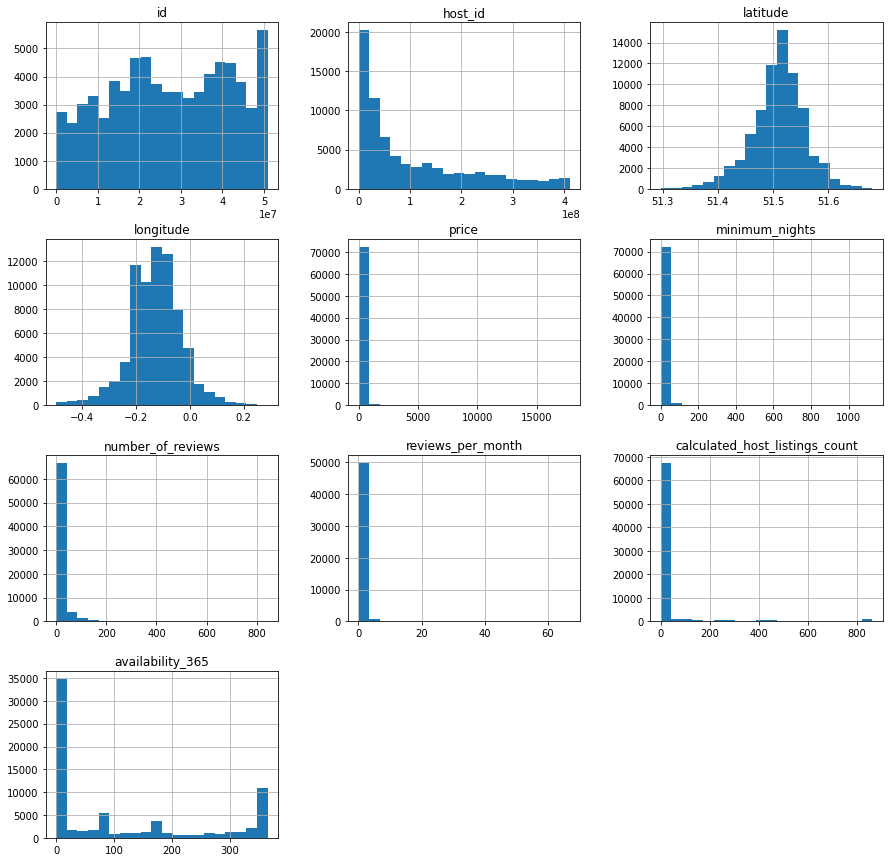

In [10]:
# plotar o histograma das variáveis numéricas
df.hist(bins=20, figsize=(15, 15));

Com esses gráficos podemos chegar a algumas idéias:

*  A variável `price`, possivelmente possui outliers;
*  A variável `minimum_nights` também deve possuir outliers; 
*  Pelo comportamento da `latitude` e `longitude`, possivelmente os imóveis estão concentrados mais em algumas regiões da cidade.

### **Q4. Qual a análise estatística dos dados?**

Agora irei analisar os dados estatísticos das variáveis `price` e `minimum_nights`, pois como visto no histograma, são as ariáveis que possivelmente possuem outliers.

In [11]:
df[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,73364.000000,73364.000000
mean,129.392386,5.825214
std,306.017740,26.320069
min,0.000000,1.000000
25%,45.000000,1.000000
50%,79.000000,2.000000
75%,131.000000,4.000000
max,17786.000000,1125.000000


Análise da variável `price`:
*  A média de preços é de 129.39, porém temos que analisar que, o preço máximo é de 17786.00 e preço das diárias ate o terceiro quartil é de 131.00, motrando que o valor max é um outlier e está influenciando no preço médio.
*  O valor mínimo é de 0.00 o que é estranho pois ninguem aluga o imóvel de graça, o que demonstra um erro no preenchimento dos dados.

Análiseda variável `minimum_nights`:
*  Aqui também vimos que o valor máximo é de 1125 noites, o que não faz muito sentido, e isso também prejudica a média
* 75% dos registros são para até 4 noites.

#### Tratando os Outliers

Nesse momento preferi excluir os outlier existentes nessas duas variáveis, e para isso vou criar um filtro para eliminar os outliers.

Para a variável `price` coloquei um limmite de 1000.00, tudo que for acima desse valor eu elimino. 

Para a variável `minimum_nights` coloquei um limite de 20 dias, tudo que for acima disse é eliminado.

In [12]:
df_clean = df.copy ()

In [25]:
df_clean.drop(df_clean[(df_clean.price > 1000) & (df_clean.price < 0)].index, axis= 0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 20].index, axis= 0, inplace=True)

In [26]:
df_clean[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,69838.000000,69838.000000
mean,112.175177,2.916177
std,119.718524,2.736237
min,0.000000,1.000000
25%,45.000000,1.000000
50%,79.000000,2.000000
75%,130.000000,3.000000
max,1000.000000,20.000000


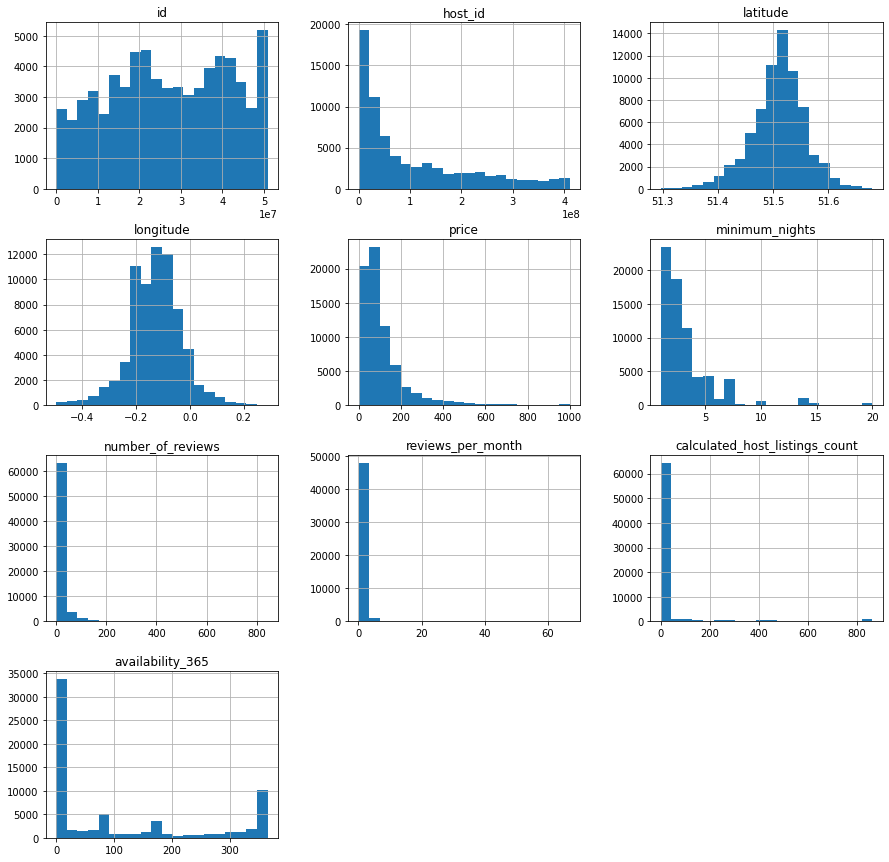

In [15]:
df_clean.hist(bins=20, figsize=(15,15));

Com esses filtros, e o tratamento nos outliers, observamos uma melhora na distribuição das variáveis.

### **Q4. Qual a correlação existente entre as variáveis**

Correlação é a relação (casual ou não) entre duas variáveis, é importante saber a correlação para que possa se observar o comportamento de uma variável em relação a outra, o que futuramente é fundamental para treinar modelos de Machine Learning.

Para fazer a correlação as variáveis têm que ser numéricas, e eu eliminei algumas variáveis que não interferem na correlação: `id`, `host_id`,  `latitude` e `longitude`.

In [16]:
df_clean.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [17]:
# Criando uma matriz de correlação:

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.037908,-0.073228,-0.032896,0.342899,0.093161
minimum_nights,0.037908,1.000000,-0.074222,-0.109034,-0.074143,-0.041332
number_of_reviews,-0.073228,-0.074222,1.000000,0.571623,-0.060028,0.077909
reviews_per_month,-0.032896,-0.109034,0.571623,1.000000,-0.018928,0.148466
calculated_host_listings_count,0.342899,-0.074143,-0.060028,-0.018928,1.000000,0.050731
availability_365,0.093161,-0.041332,0.077909,0.148466,0.050731,1.000000


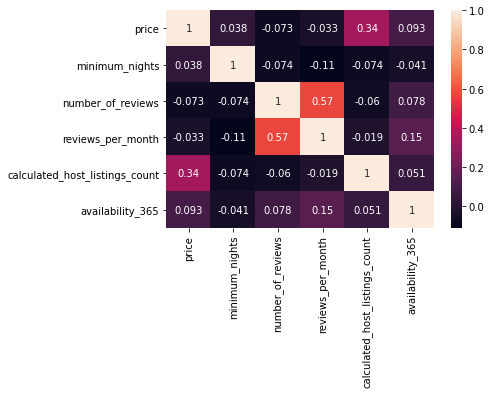

In [18]:
# plotar um heatmap a partir das correlações

sns.heatmap(corr, annot=True);

*  Aparentemente não existe variáveis com correlação muit forte, inclusive a maioria tem uma leve correlação negativa.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [19]:
# mostrar a quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()

Entire home/apt    37790
Private room       31048
Shared room          541
Hotel room           459
Name: room_type, dtype: int64

In [20]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df_clean.room_type.value_counts() / df_clean.shape[0] * 100

Entire home/apt    54.110942
Private room       44.457172
Shared room         0.774650
Hotel room          0.657235
Name: room_type, dtype: float64

*  O tipo de imóvel mais alugado é o imóvel inteiro, seguido de quarto privativo.

*  Esses dois tipos correspondem a aproximadamente 98% de todos os tipos de acomodações.

### **Q6. Qual a localidade mais cara do dataset?**



In [21]:
# ver preços por bairros, na média
df_clean.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

neighbourhood
Kensington and Chelsea    180.793536
Westminster               174.231775
City of London            154.147420
Hammersmith and Fulham    129.707116
Richmond upon Thames      129.125125
Camden                    126.799214
Wandsworth                123.692916
Merton                    113.618073
Islington                 108.085828
Southwark                 103.682939
Brent                     101.466372
Lambeth                    97.006648
Hounslow                   92.726462
Hackney                    91.700532
Tower Hamlets              91.019486
Barnet                     87.596859
Newham                     84.972477
Greenwich                  84.825526
Ealing                     84.249682
Kingston upon Thames       81.079612
Haringey                   78.864962
Havering                   76.590717
Hillingdon                 74.996769
Bromley                    73.881041
Harrow                     71.970655
Redbridge                  70.623656
Waltham Forest          

In [22]:
print(df_clean[df_clean.neighbourhood == 'Kensington and Chelsea'].shape)

(4858, 15)


In [23]:
len(df_clean[df_clean.neighbourhood == 'Kensington and Chelsea']) / df_clean.shape[0] * 100

6.956098399152324

os 3 bairros mais caros para alugar em londres são:

*  Kensington and Chelsea;
*  Westminster;
*  City of London.

Verifiquei se a quantidade de imóveis oferecidos nesses bairros não eram baixas (o que distorceria os preços), mas como visto acima, isso não ocorreu e dá para concluir que esses 3 bairros realmente são os mais caros para se hospedar em Londres.

Como possuimos Latitude e Longitude, podemos criar uma scatterplot para plotar os imóveis:

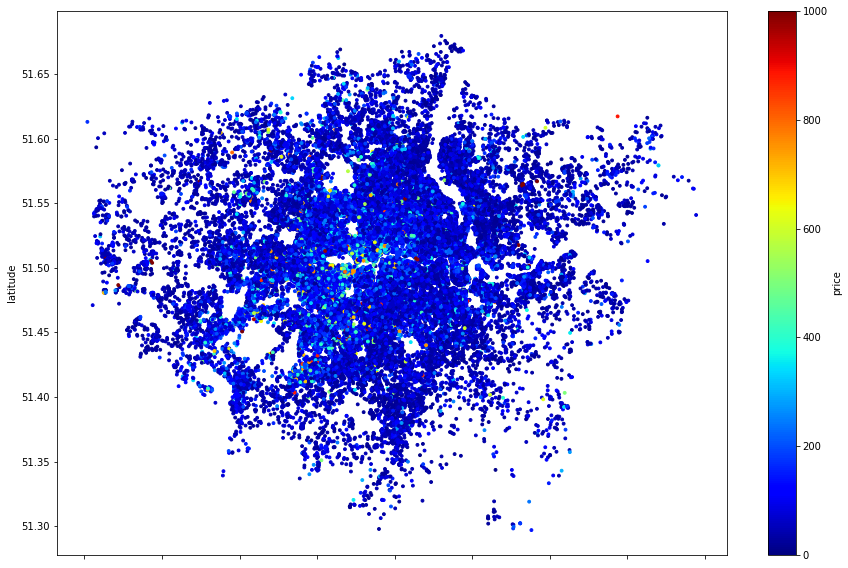

In [24]:
# plotar os imóveis pela latitude-longitude

df_clean.plot(kind="scatter", x='longitude', y='latitude', c='price', s=8, figsize=(15,10), cmap=plt.get_cmap('jet'));

## Conclusões


Mesmo sendo uma análise mais superficial, podemos tirar algumas informações dela:
*  O data set possuía outliers em algumas variáveis;
*  Em uma primeira análise, não existe uma correlação muito forte entre as variáveis;
*  Os tipos de acomodações imóvel inteiro e quarto privado, representam 98% das locações;
*  pelo mapa gerado pelo scatterplot, dá para perceber que as regiões mais caras para se locar estão mais concentrados na região central.